# SVD(Singular Value Decomposition)

* PCA와 유사한 행렬 분해 기법
* PCA는 정방행렬(즉, 행과 열의 크기가 같은 행렬)만을 고유벡터로 분해할 수 있지만, SVD는 정방핼령뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다.
* m * n 크기의 행렬 A를 다음과 같이 분해하는 것.

    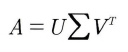

* SVD = 특이값 분해.
* 특이벡터 : singular vector, 행렬 U와 V에 속한 벡터, 모두 서로 직교.
* Σ(m x n) : 대각행렬, 행렬의 대각원소를 제외한 나머지 값들이 모두 0.
* 특이값 : Σ의 대각에 위치한 값

A(m * n 차원) => U의 차원이 m * m, Σ의 차원이 m * n, V^T의 차원이 n * n으로 분해. Σ의 비대각인 부분와 대각원소 중에 특이값이 0인 부분을 모두 제거하고, 제거된 Σ에 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용한다. 

**컴팩트한 형태로 SVD를 적용하면 A의 차원이 m * n 일때, U의 차원은 m * p, Σ의 차원을 p * p, V^T의 차원을 p * n으로 분해.**

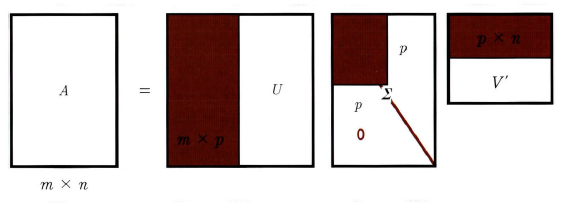

Trancated SVD는 Σ의 대각원소 중에서 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 더욱 차원을 줄인 형태로 분해.

    from numpy.linalg import svd
    from scipy.linalg import svd

In [1]:
# 랜덤 4 * 4 넘파이 행렬을 생성 -> 행렬의 개별 로우끼리의 의존성을 없애기 위해
import numpy as np
from numpy.linalg import svd

# 4 * 4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


생성된 행렬 a에 SVD를 적용해 U, Sigma, Vt를 도출.

SVD분해는 numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U 행렬, Sigma 행렬, V 전치 행렬을 반환한다.

Sigma 행렬의 경우, A=UΣV^T 에서 Σ 행렬을 나타내며, Σ 행렬의 경우 행렬의 대각 위치가 아닌 경우 모두 0. 

0이 아닌 값의 경우만 1차원 행렬로 표현.

In [2]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


U 행렬이 4 * 4, Vt 행렬이 4 * 4, Sigma 행렬은 1차원 행렬인 (4,)로 반환.

분해된 이 U, Sigma, Vt를 이용해 다시 원본 행렬로 복원.

복원 방법 =  U, Sigma, Vt를 내적.

유의할 점 = Sigma의 경우 0이 아닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭행렬로 변환한 뒤 내적을 수행해야 한다.

In [3]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
Sigma_mat

array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])

In [4]:
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


U, Sigma, Vt를 이용해 a_는 원본 행렬 a와 동일하게 복원됨을 알 수 있다.

a에게 의존성을 부여한 후 Sigma의 변화와 차원 축소를 알아본다.

In [5]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [6]:
# SVD 수행
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


이전 Sigma Value: [3.423 2.023 0.463 0.079]

이전과 차원은 같지만, 값 중 2개가 0으로 변했다. 즉, 선형 독립인 로우 벡터의 개수가 2개라는 의미이다(행렬의 랭크(Rank)가 2이다).

U, Sigma, Vt의 전체 데이터를 이용하지 않고, Sigma의 0에 대응되는 U, Sigma, Vt의 데이터를 제외하고 복원. 즉, Sigma의 경우 앞의 2개 요소만 0이 아니므로 U 행렬 중 선행 두 개의 열만 추출하고, Vt의 경우는 선행 두 개의 행만 추출해 복원하는 것.

In [7]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


# Truncated SVD를 이용한 행렬 분해

Truncated SVD는 Σ 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식.

Trancated SVD는 인위적으로 더 작은 차원의 U, Σ, V^T로 분해하기 때문에 원본 행렬을 정확하게 원복할 수는 없다. 하지만 데이터 정보가 압축되어 분해됨에도 불구하고 상당 수준으로 원본 행렬을 근사할 수 있다.

원래 차원의 차수에 가깝게 잘라낼수록(Truncate) 원본 행렬에 더 가깝게 복원할 수 있다.

In [8]:
import numpy as np
from scipy.sparse.linalg import svds # Truncated SVD는 희소 행렬로만 지원
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적요할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma 값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma 값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231

6 * 6 행렬을 SVD 분해하면 U, Sigma, Vt가 각각 (6, 6) (6,) (6, 6) 차원이지만, Truncated SVD의 n_components를 4로 설정해 U, Sigma, Vt를 (6, 4) (4,) (4,6)로 각각 분해했다. Truncated SVD로 분해된 행렬로 다시 복원할 경우 완벽하게 복원하지 않고 근사적으로 복원되었다.

# 사이킷런 TruncatedSVD 클래스를 이용한 변환

사이킷런의 TruncatedSVD 클래스는 fit()과 transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트(Truncated SVD의 K 컴포넌트 수)로 차원을 축소해 변환한다. 원본 데이터를 Truncated SVD 방식으로 분해된 U * Sigma 행렬에 선형 변환해 생성한다.

Text(0, 0.5, 'TruncatedSVD Component 2')

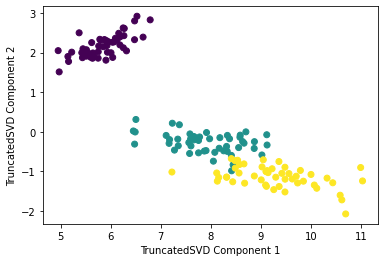

In [9]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

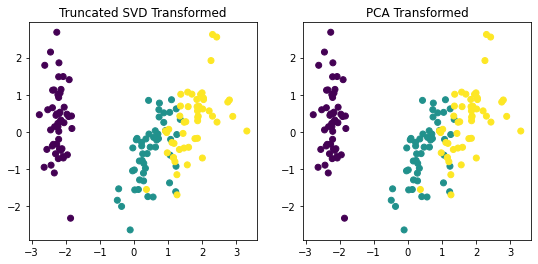

In [10]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

### 두 개의 변환 행렬 값과 원복 속성 컴포넌트 비율 확인

In [11]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.339760329927998e-15
4.85722573273506e-17


0에 가까운 값으로 2개의 변환이 서로 동일함을 알 수 있다. 즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다.

PCA는 SVD 알고리즘으로 구현되었다. 하지만 PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능하지만 SVD는 밀집(Dense), 희소(Sparse) 행렬 모두 가능하다.

SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용된다. 또한 텍스트의 토픽 모델링 기법인 LSA(Latent Semantic Analysis)의 기반 알고리즘이다.